In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats

In [3]:
dataset = pd.read_csv('CC GENERAL.csv')

In [4]:
dataset.shape

(8950, 18)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
dataset.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [14]:
dataset[dataset.duplicated()].count()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


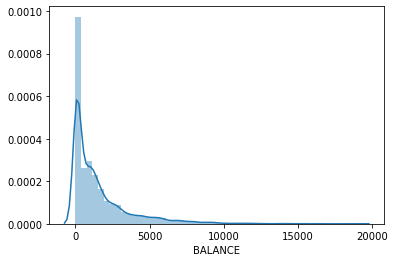

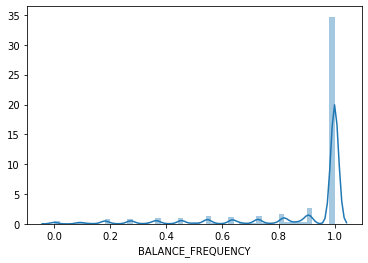

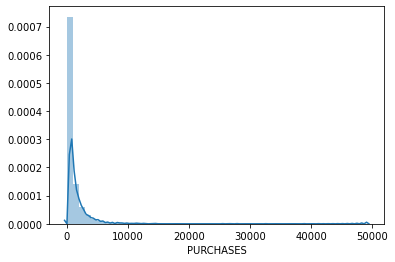

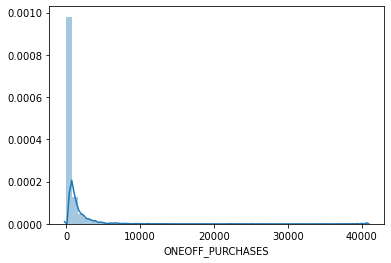

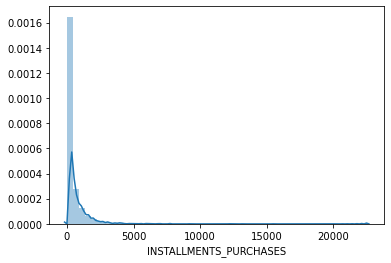

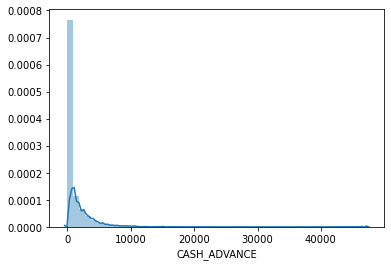

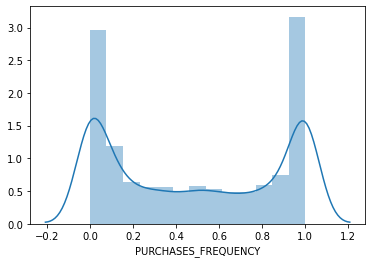

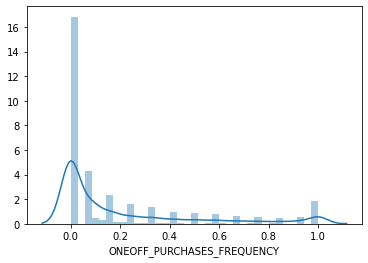

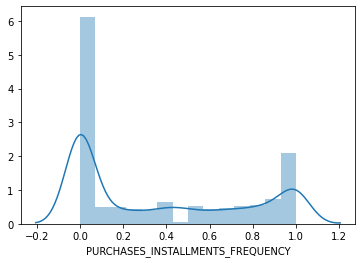

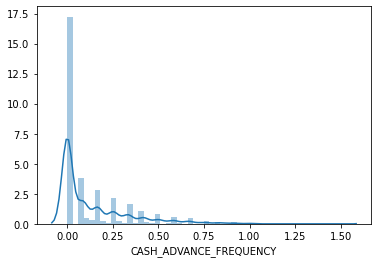

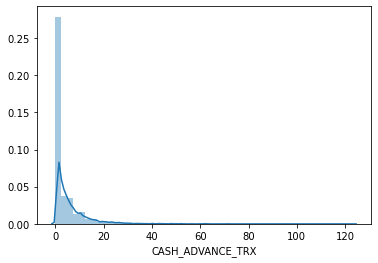

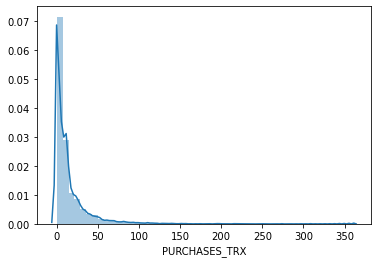

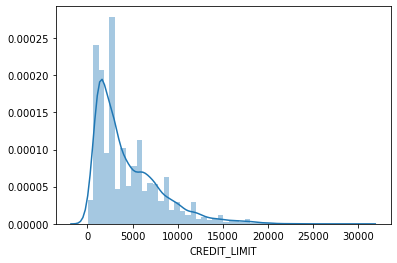

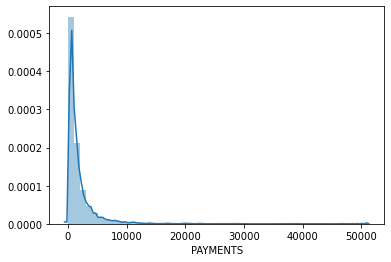

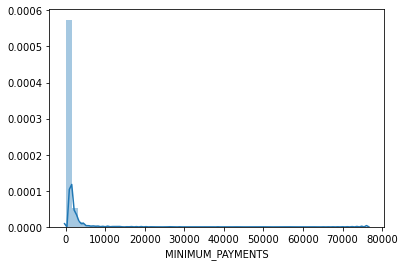

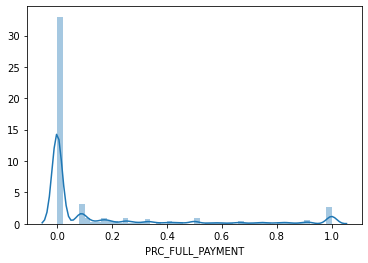

In [10]:
for i in dataset.columns[1:-1]:
    sns.distplot(dataset[i])
    plt.show()

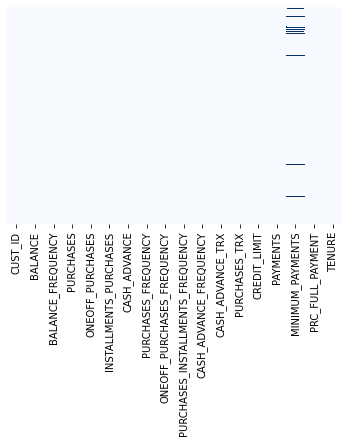

In [40]:
sns.heatmap(dataset.isnull(), cmap='Blues', cbar = False, yticklabels=False)
plt.show()

In [11]:
dataset.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
dataset[dataset['ONEOFF_PURCHASES'] == 40761.25000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [ ]:
# Handelling the missing values
# 1. the missing value count is very less compared to the total record count in the dataset, so we can remove these rows
# 2. Another approach could be imputing mean or median values for the missing columns and see how the model is performing.
# Since the dataset is skewed - we will go with the median impute

In [13]:
# Fill up the missing elements with the median of the 'MINIMUM_PAYMENTS'
dataset.loc[(dataset['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = dataset['MINIMUM_PAYMENTS'].median()

In [14]:
# Fill up the missing elements with the median of the 'CREDIT_LIMIT'
dataset.loc[(dataset['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = dataset['CREDIT_LIMIT'].median()

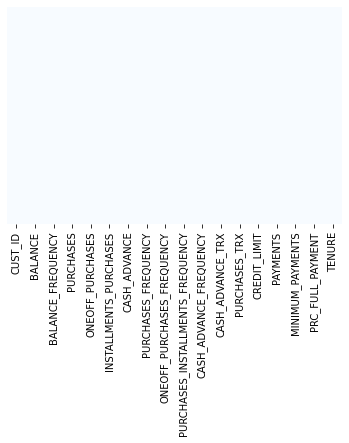

In [15]:
sns.heatmap(dataset.isnull(), cmap='Blues', cbar = False, yticklabels=False)
plt.show()

In [16]:
# Checking the duplicates
dataset.duplicated().sum()

0

In [18]:
# Lets drop customer_id because this has no meaning here
dataset.drop('CUST_ID', axis=1, inplace=True)

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


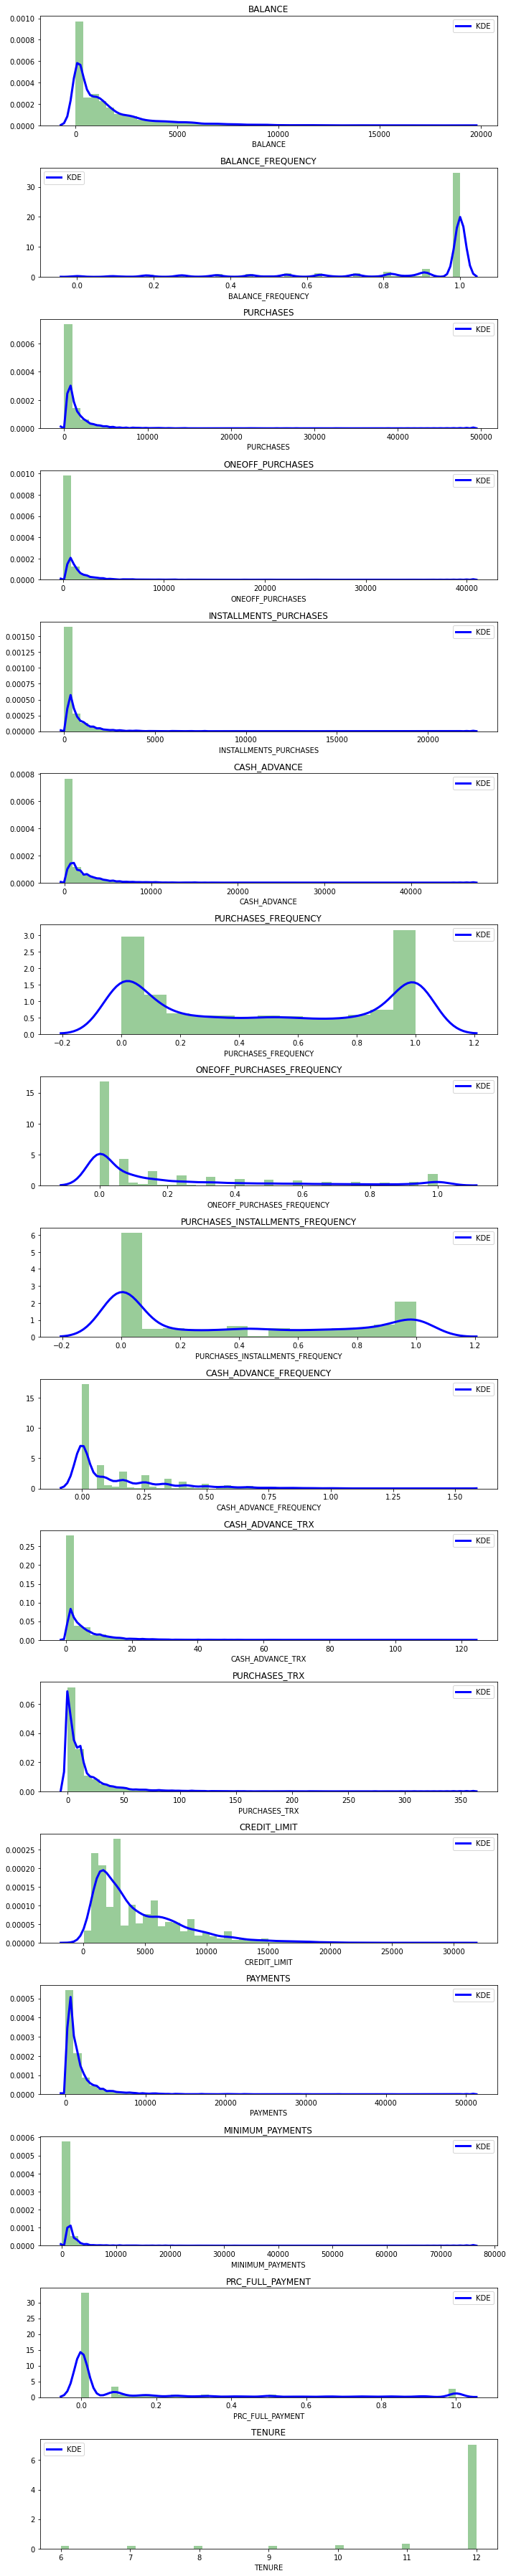

In [68]:
# Univariate Analysis
plt.figure(figsize=(10,50))
for i in range(len(dataset.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(dataset[dataset.columns[i]], kde_kws={'color': 'b', 'lw':3, 'label':'KDE'}, hist_kws={'color':'g'})
    plt.title(dataset.columns[i])
    
plt.tight_layout()

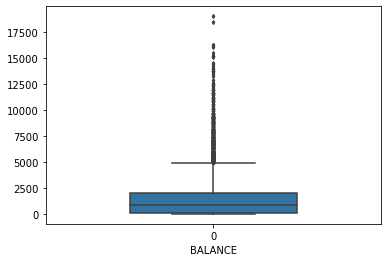

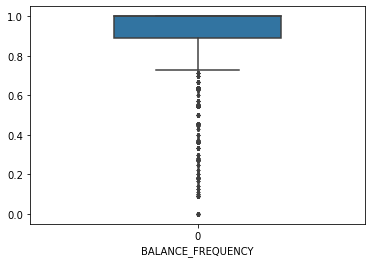

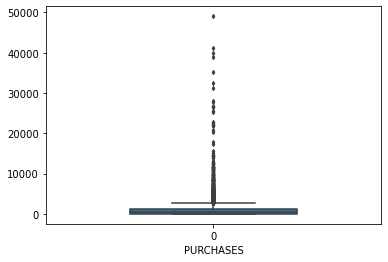

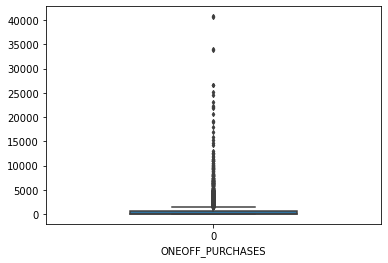

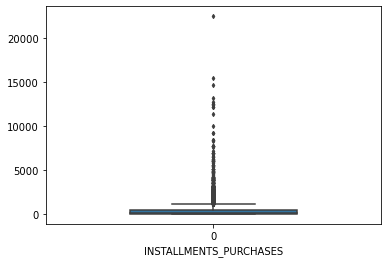

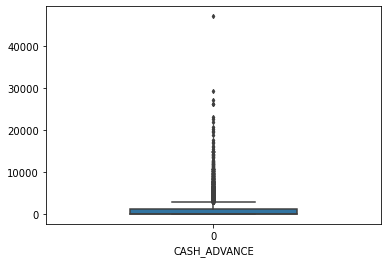

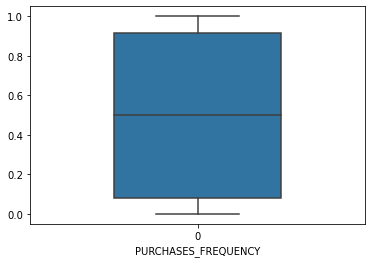

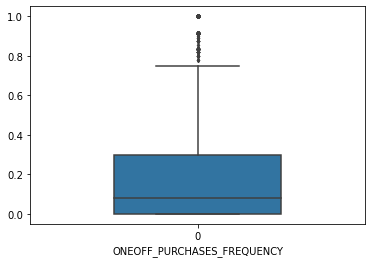

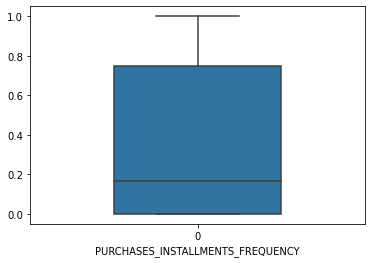

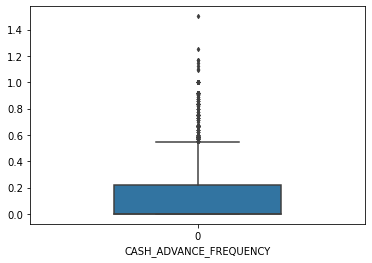

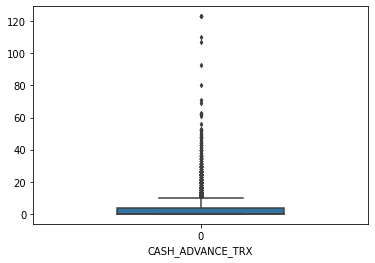

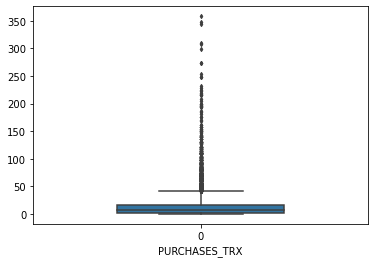

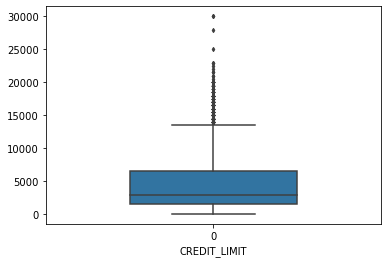

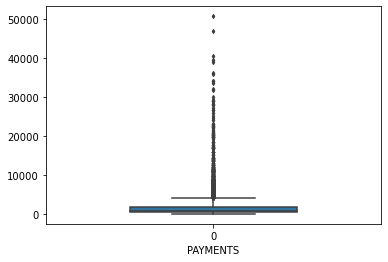

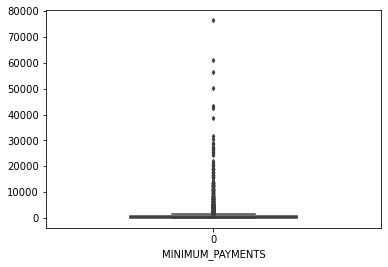

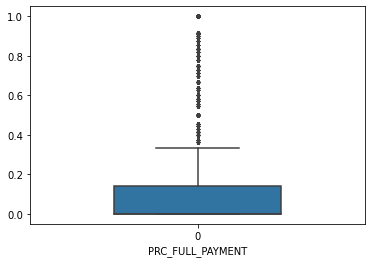

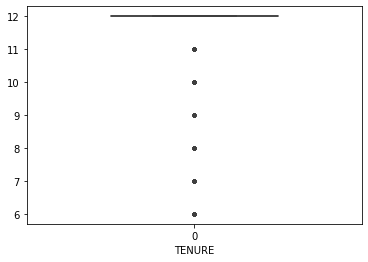

In [64]:
#Check for outliers
#fig, ax = plt.subplots(figsize = (5,5))
for i in dataset.columns.values:
    sns.boxplot(data=dataset[i], width=0.5, fliersize=3)
    plt.xlabel(i)
    plt.show()

In [69]:
dataset.shape

(8950, 17)

In [72]:
# Using Z-Score approach to remove outliers
z = np.abs(stats.zscore(dataset))
dataset = dataset[(z<3).all(axis=1)]

In [73]:
dataset.shape

(7434, 17)

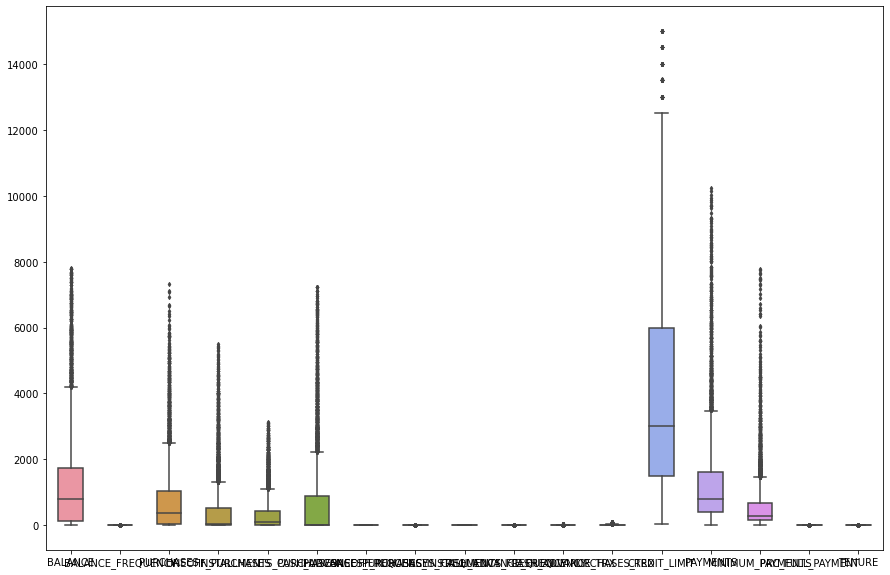

In [76]:
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data=dataset, width=0.5, ax=ax, fliersize=3)

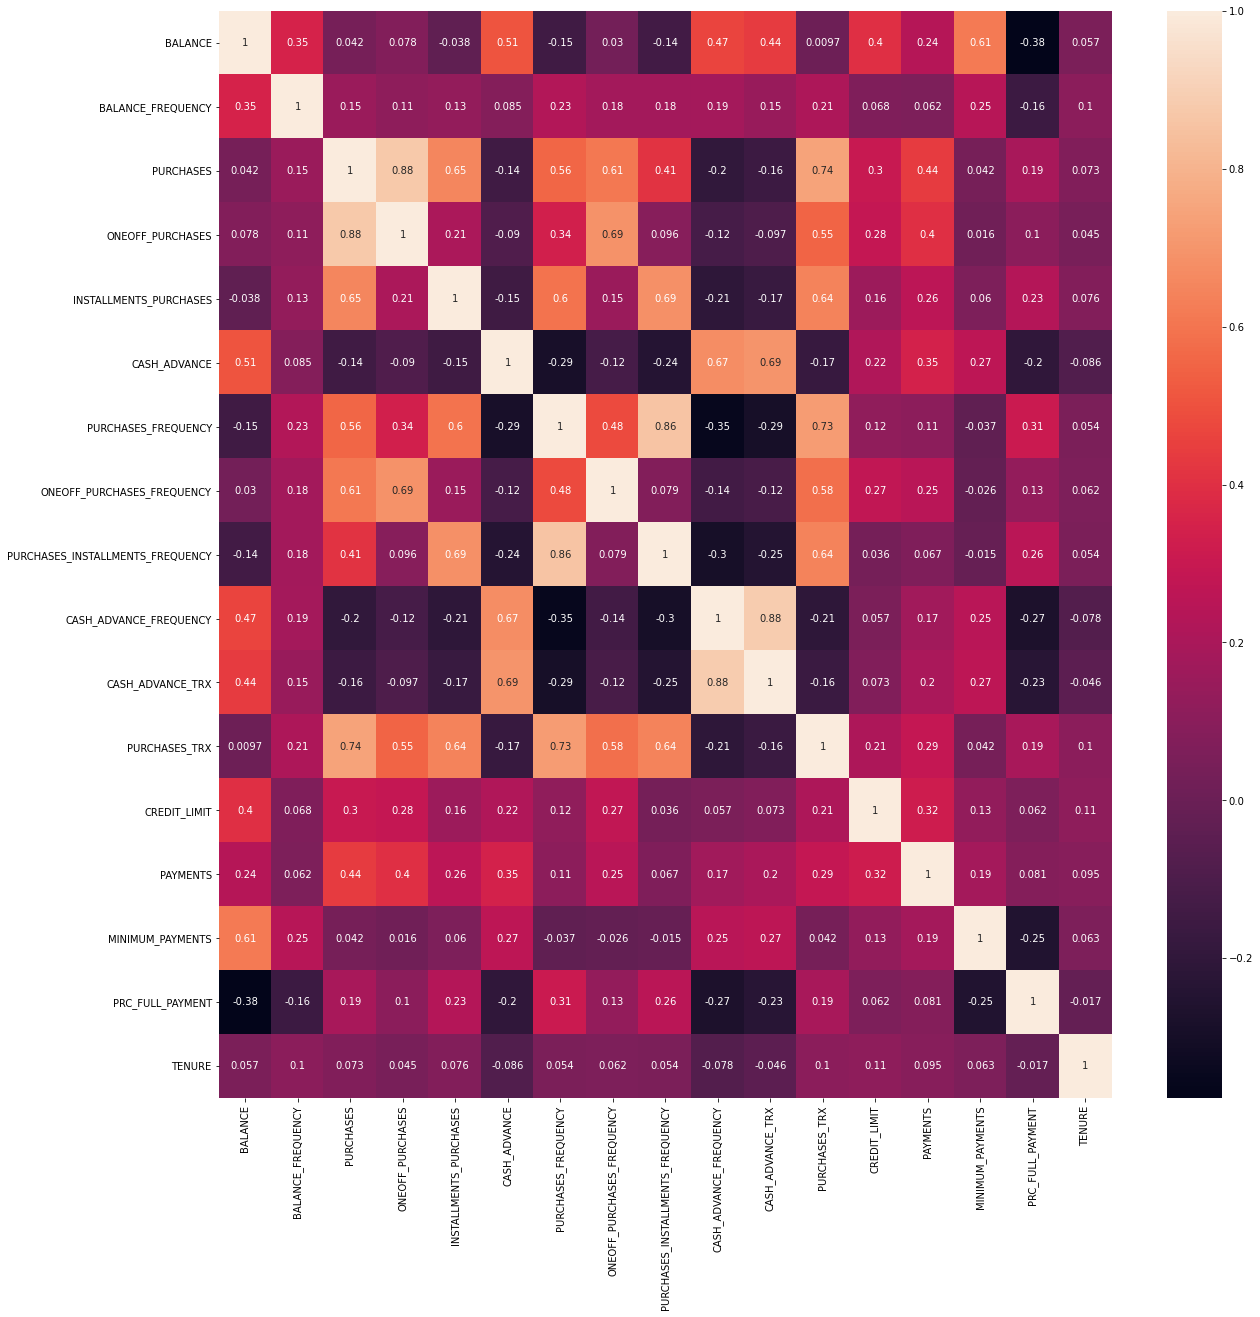

In [77]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(dataset.corr(), annot=True)

In [78]:
# Let's scale the data before we begin modelling
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(dataset)

In [82]:
creditcard_df_scaled.view()

array([[-0.80965236, -0.33491067, -0.64144794, ..., -0.56418479,
        -0.53152321,  0.31218731],
       [ 1.27327162,  0.09112689, -0.73448727, ...,  0.63748261,
         0.2326373 ,  0.31218731],
       [ 0.80727139,  0.51716446,  0.01955068, ...,  0.06416447,
        -0.53152321,  0.31218731],
       ...,
       [-0.26386232, -0.65444001, -0.73448727, ..., -0.30850755,
        -0.53152321, -4.6976356 ],
       [-0.74584887,  0.51716446, -0.30439979, ..., -0.5833401 ,
        -0.53152321, -4.6976356 ],
       [-0.61848108, -0.65444001, -0.65529656, ..., -0.47973622,
        -0.53152321, -4.6976356 ]])

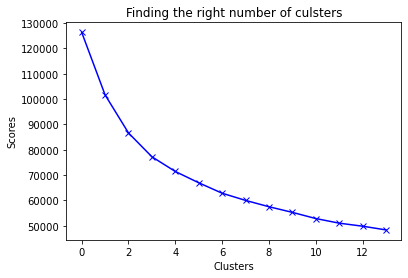

In [83]:
# Obtain optimal number of clusters
scores_1 =[]

range_values = range(1, 15)

for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled)
    scores_1.append(kmeans.inertia_)
    
plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of culsters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

In [89]:
# Looking at the values 
range_values = range(1, 15)
old_wcss = 0
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled)
    wcss = kmeans.inertia_
    difference = old_wcss - wcss
    print(f'{i} | {wcss} | {difference}')
    old_wcss = wcss


1 | 126377.99999999971 | -126377.99999999971
2 | 101658.08224078678 | 24719.917759212927
3 | 86639.35222465514 | 15018.730016131638
4 | 77243.50343483785 | 9395.84878981729
5 | 71436.31034629677 | 5807.193088541084
6 | 66981.98926849279 | 4454.321077803979
7 | 62859.01663063802 | 4122.972637854771
8 | 59935.616879925285 | 2923.399750712735
9 | 57308.990150902835 | 2626.6267290224496
10 | 54947.2859995489 | 2361.704151353937
11 | 53285.787153663514 | 1661.498845885384
12 | 51131.1966240533 | 2154.5905296102137
13 | 49647.27181598143 | 1483.924808071868
14 | 48377.05659464862 | 1270.2152213328154


In [100]:
# Build the KMeans model
kmeans = KMeans(5)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [101]:
# Add Cluster_no (labels) into the dataset
creditcard_df_cluster = pd.concat([dataset, pd.DataFrame({'Cluster':labels})], axis=1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,1.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,2.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0,1.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1.0


In [93]:
kmeans.cluster_centers_.shape

(4, 17)

In [95]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[dataset.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.474594,0.156033,0.014921,-0.347883,0.576662,-0.454128,0.960239,-0.298795,1.107356,-0.526396,-0.469712,0.325257,-0.251073,-0.286511,-0.186636,0.478366,-0.016911
1,-0.256086,-0.360900,-0.472271,-0.272861,-0.529356,-0.246749,-0.725145,-0.271785,-0.700134,-0.175918,-0.236529,-0.574844,-0.302226,-0.347844,-0.207337,-0.247571,-0.017830
2,1.250568,0.326079,-0.432445,-0.302973,-0.401683,1.607167,-0.637048,-0.316940,-0.545102,1.589400,1.619417,-0.467133,0.486564,0.553644,0.785950,-0.428278,-0.091472
3,0.181379,0.375395,1.818842,1.767305,0.913875,-0.289542,1.037531,1.689833,0.590383,-0.339301,-0.304122,1.581365,0.773301,0.892752,0.041553,0.317562,0.186480


In [96]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(cluster_centers, columns=[dataset.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,549.468642,0.922941,768.422968,155.228083,613.890871,110.995151,0.866311,0.106411,0.792245,0.026103,0.463463,16.975475,3262.521739,886.020637,432.593113,0.293681,11.737237
1,881.131151,0.812636,268.869242,214.758226,54.269557,367.160157,0.198354,0.114179,0.082621,0.081747,1.382391,3.366645,3112.351114,797.921778,416.523461,0.082575,11.736504
2,3168.006453,0.959226,309.705541,190.864362,118.869225,2657.212387,0.233269,0.101192,0.143487,0.362022,8.696284,4.995153,5428.005826,2092.820457,1187.592823,0.030024,11.677706
3,1545.137203,0.969749,2618.114843,1833.646372,784.513591,314.300676,0.896943,0.678339,0.589280,0.055808,1.116022,35.966851,6269.780680,2579.916713,609.731646,0.246919,11.899632


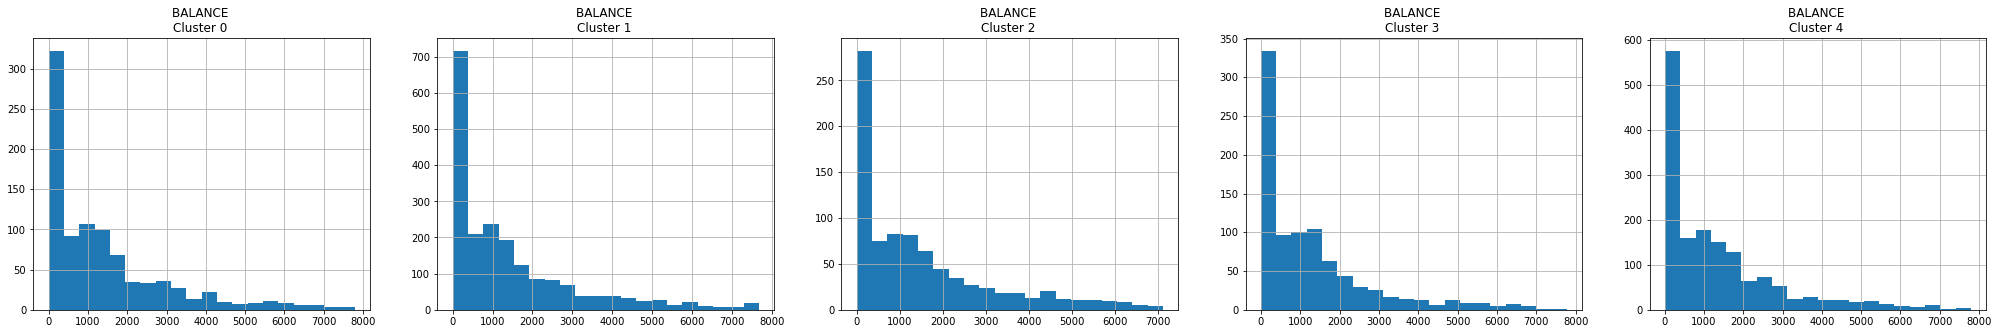

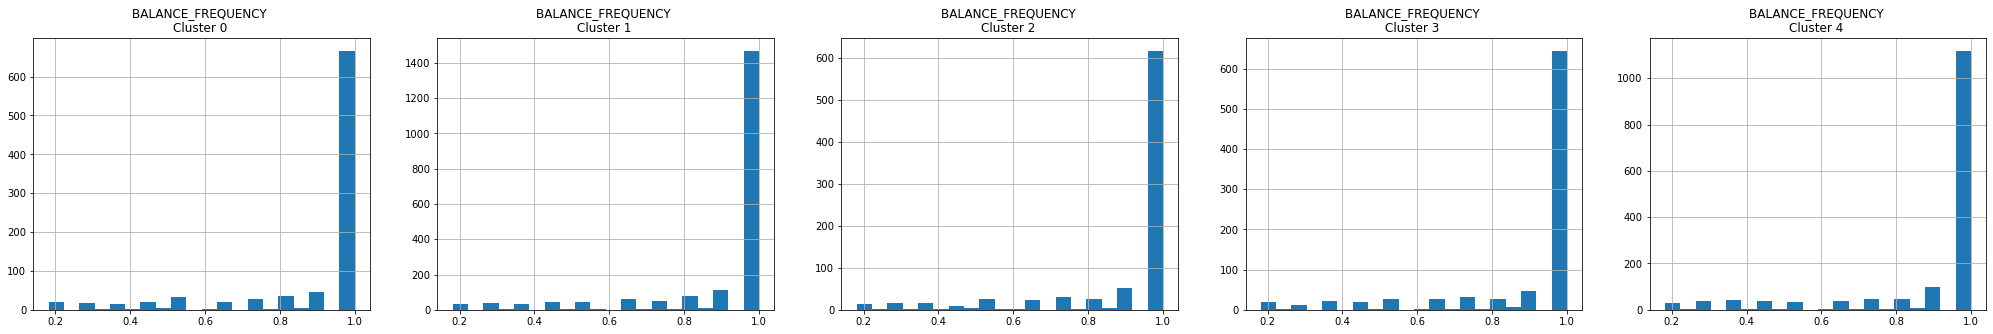

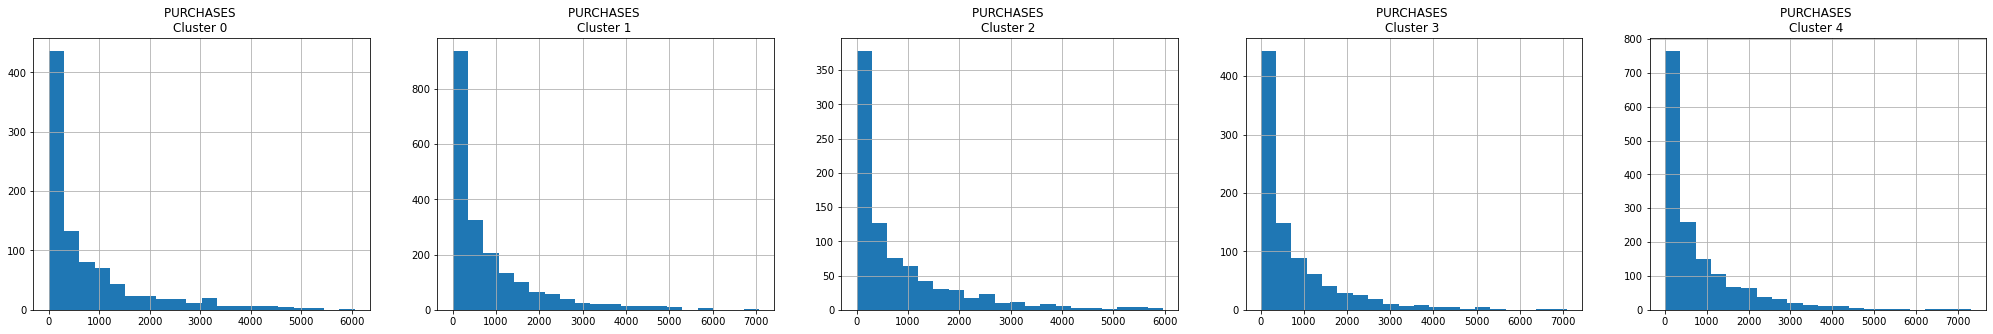

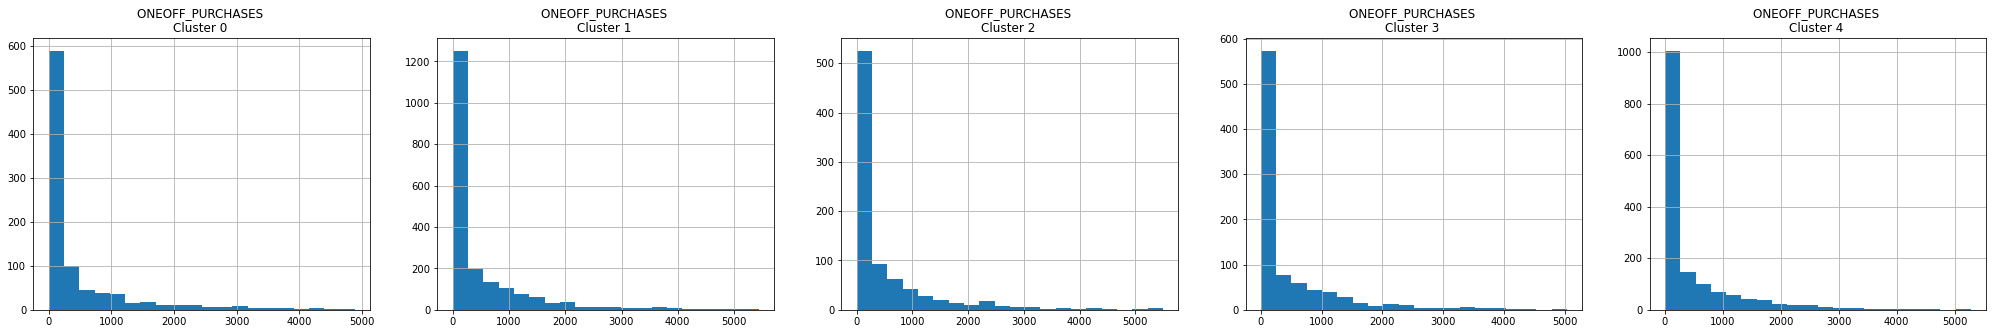

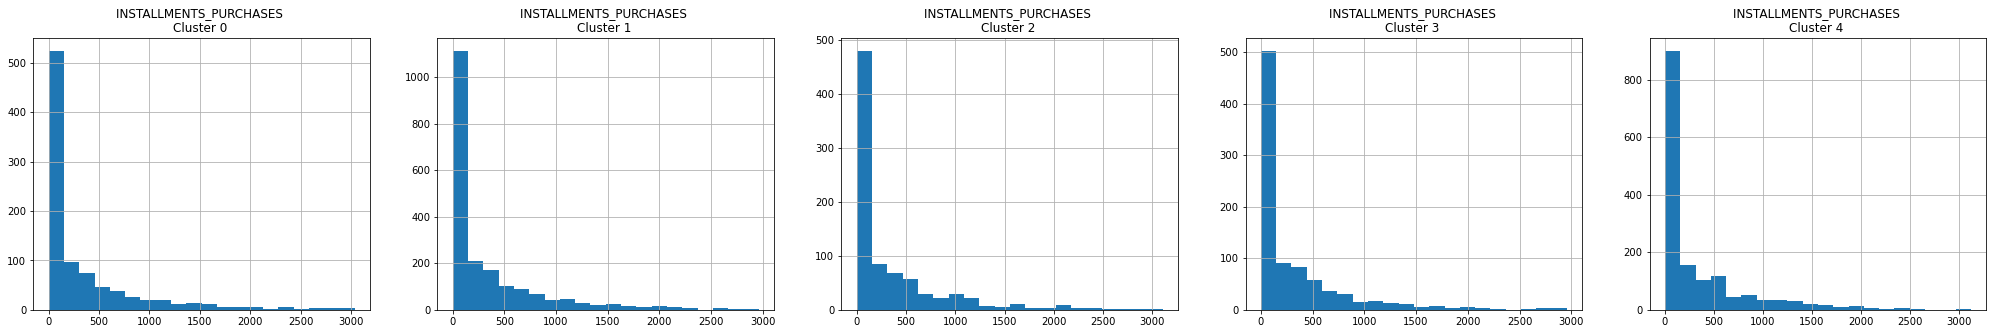

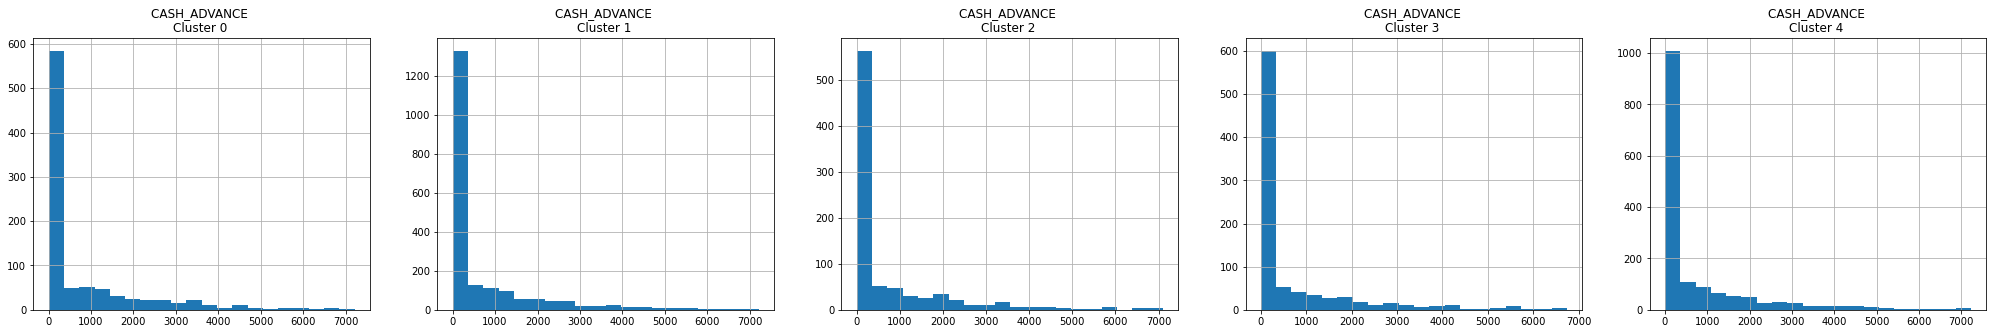

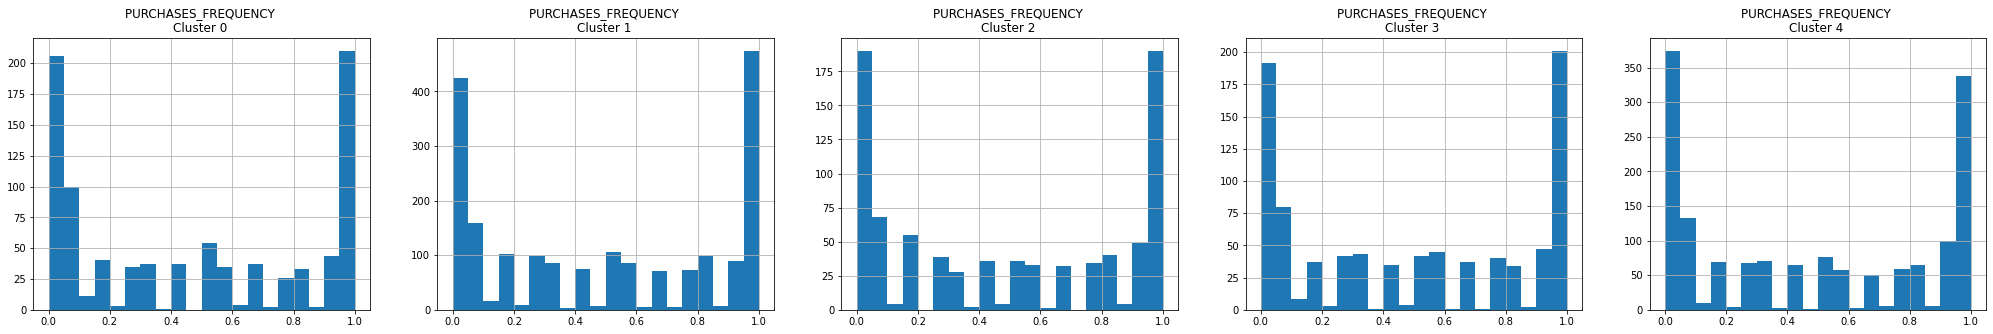

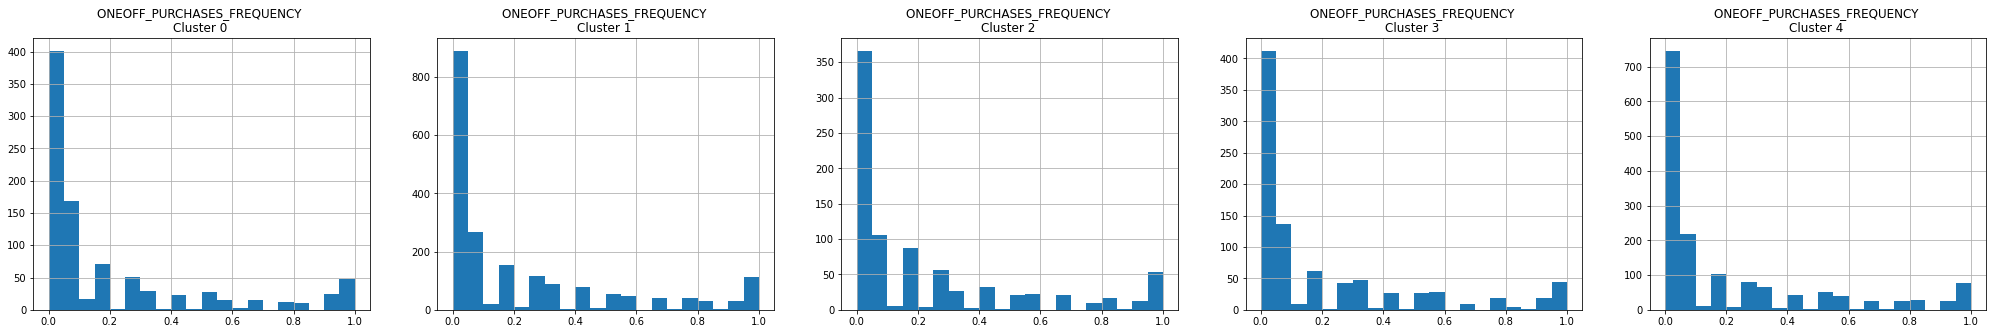

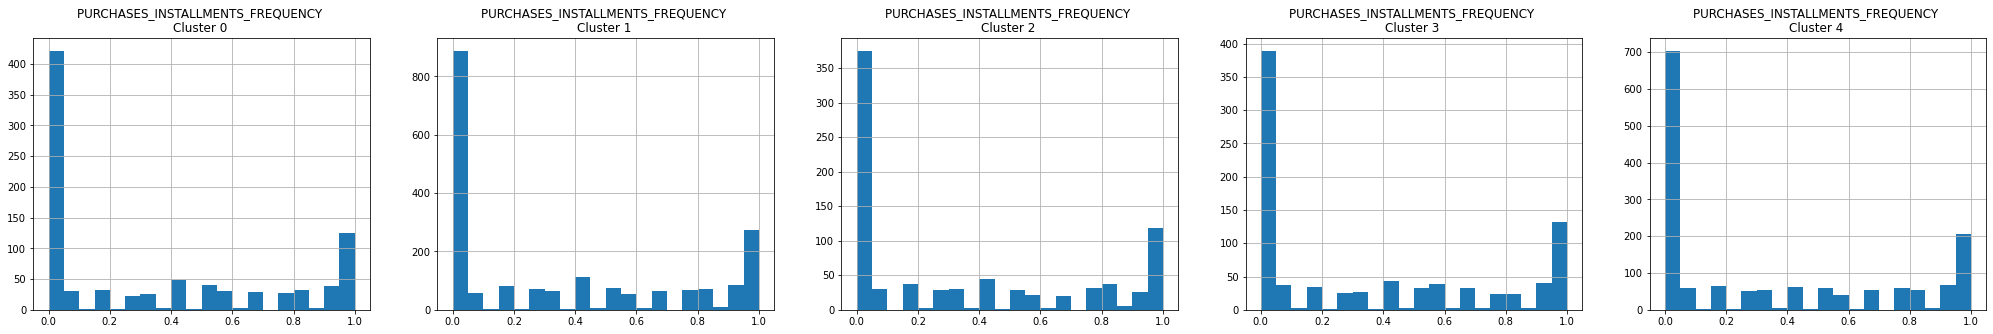

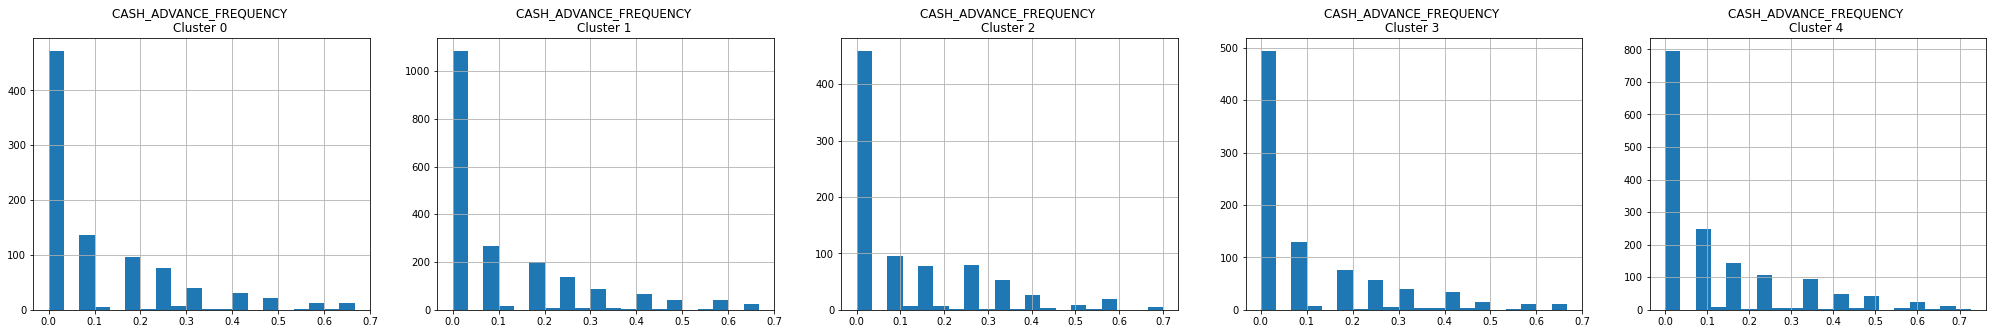

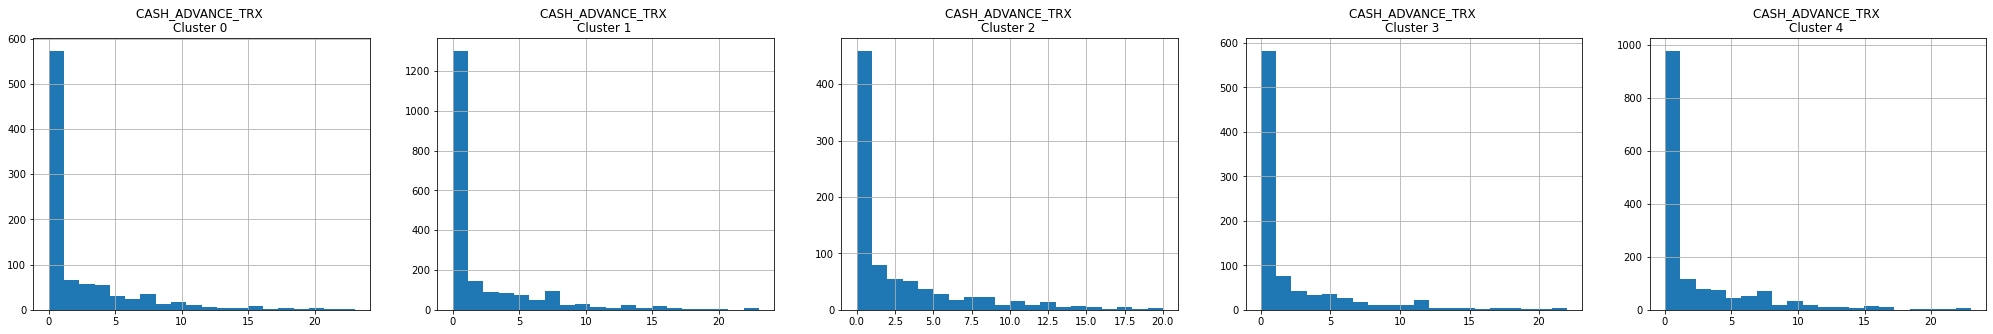

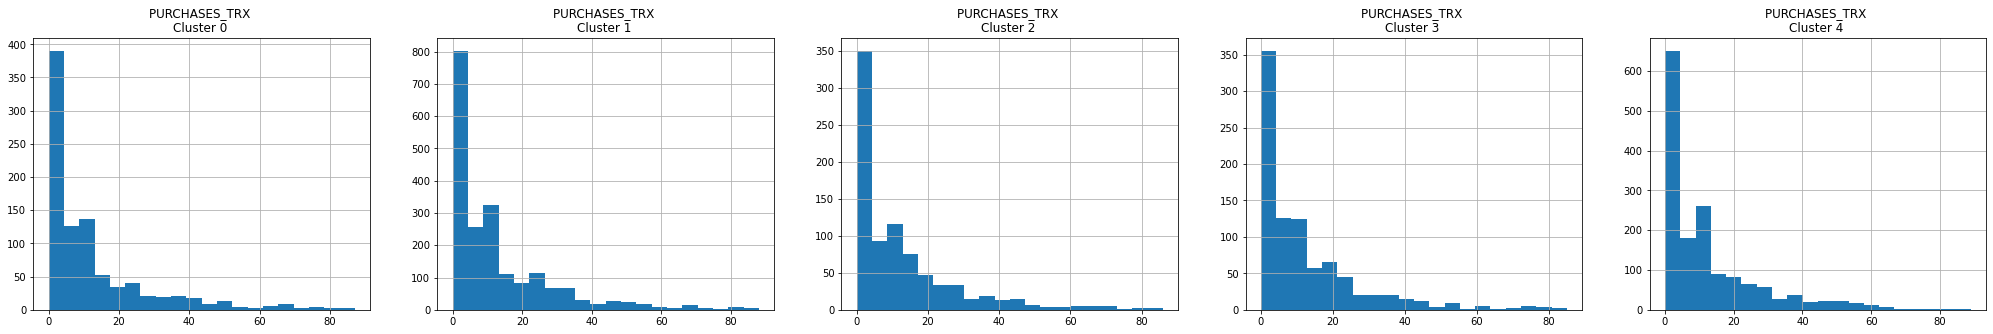

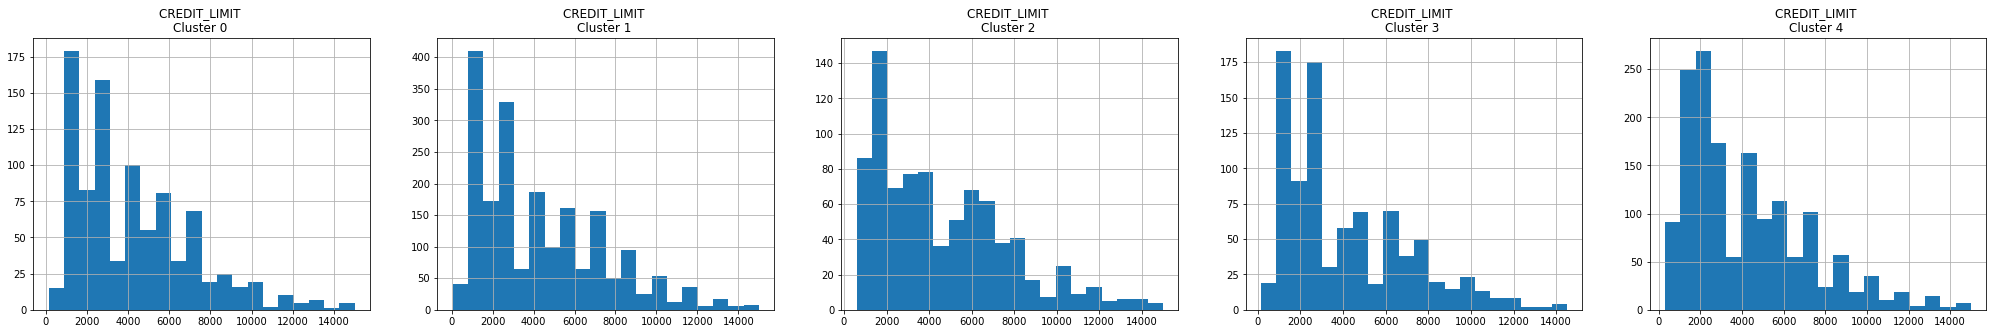

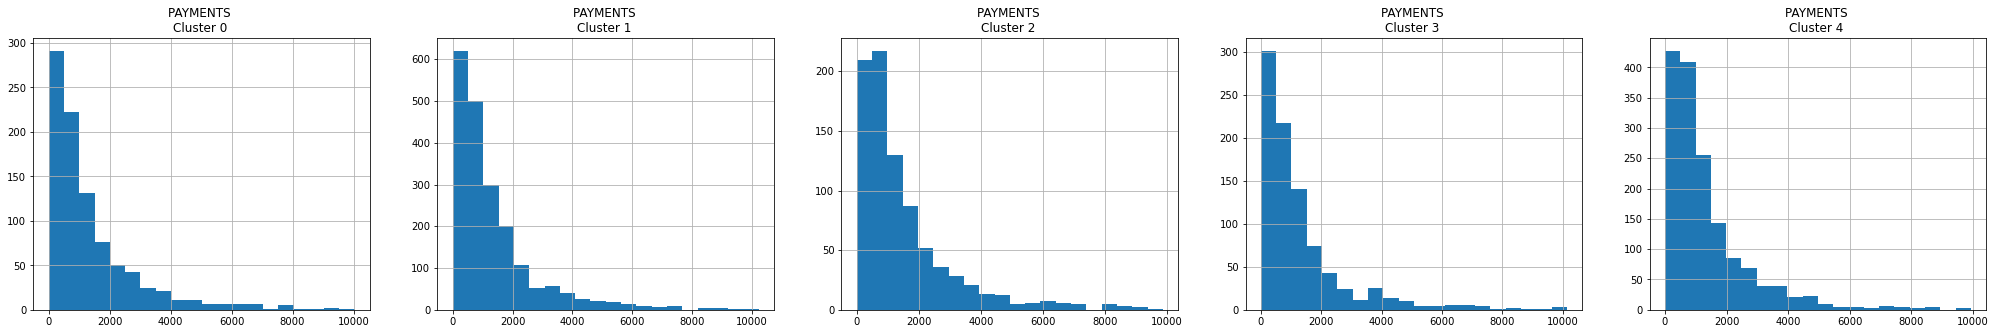

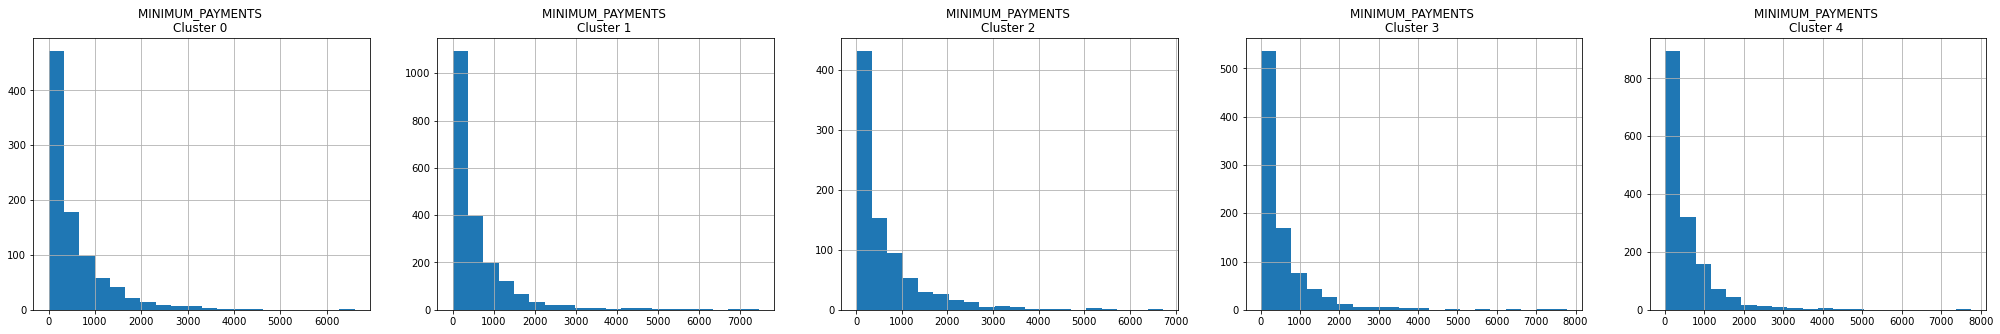

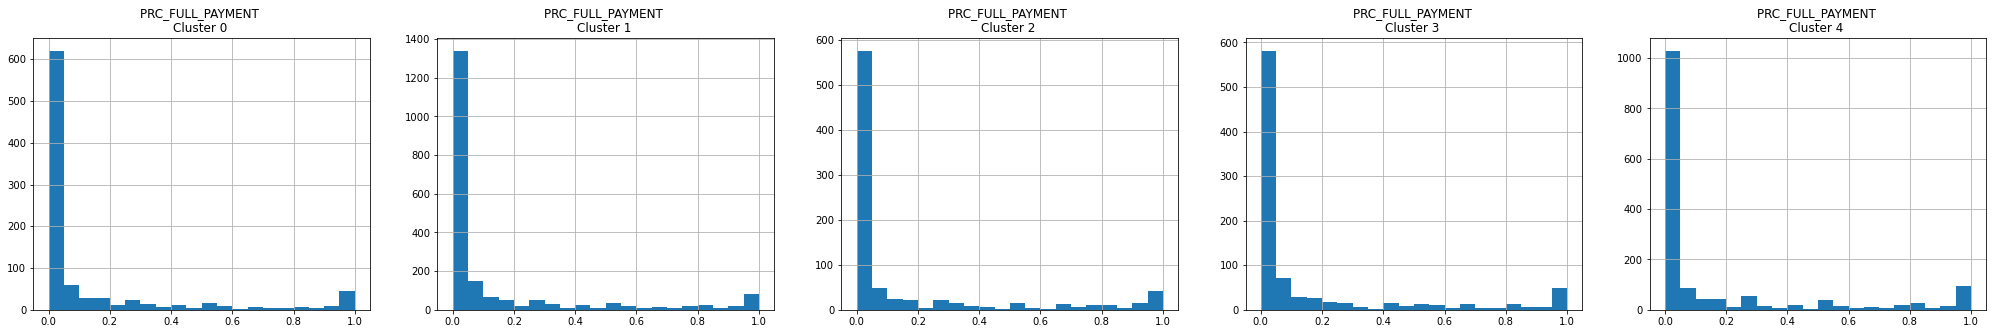

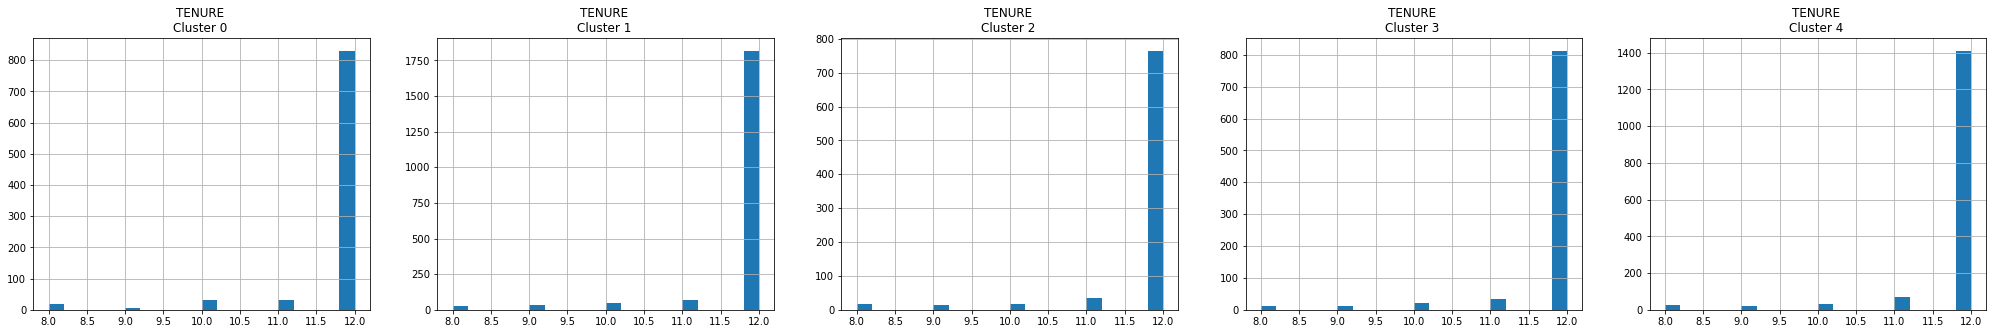

In [104]:
# Plot the histogram of various clusters
for i in dataset.columns:
    plt.figure(figsize=(35,5))
    for j in range(5):
        plt.subplot(1, 5, j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['Cluster'] == j]
        cluster[i].hist(bins=20)
        plt.title('{} \nCluster {} '.format(i, j))
    
    plt.show()